# UNIFIED MENTOR INTERNSHIP

## Project Title:- Financial Analytics
Technologies - Data Science

Domain - Finance

Project Difficulties level - Intermediate


## Problem Statement:
Without analyzing the competition, it is difficult for a business to survive. 

You are tasked to analyzing the competition for the management to provide better results.

This data set has information on the market capitalization of the top 500 companies in India.


Serial Number, Name of Company, Market Capitalization in Crores ,Quarterly Sale in crores


Find key metrics and factors and show the meaningful relationships between attributes.

Do your own research and come up with your findings.

### Importing Liabraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [26]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Financial Analytics data.csv")
df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [27]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [28]:
df.shape

(488, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [30]:
#checking Duplicated values
df.duplicated().sum()

0

In [31]:
#checking missing values
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [32]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

S.No.                 0.000000
Name                  0.000000
Mar Cap - Crore       1.844262
Sales Qtr - Crore    25.204918
Unnamed: 4           80.737705
dtype: float64


In [33]:
df = df.drop('Unnamed: 4',axis=1)
df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [78]:
#Handle missing values
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].mean(),inplace=True)

In [36]:
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].mean(),inplace=True)

In [37]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [38]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,28043.857119,4395.976849
std,145.884078,58912.585788,9589.680655
min,1.000000,3017.070000,47.240000
25%,122.750000,4879.612500,725.732500
50%,252.500000,10380.425000,2095.335000
75%,378.250000,25502.085000,4395.976849
max,500.000000,583436.720000,110666.930000


Market Capitalization to Sales Ratio: This ratio can give insight into how well a company is utilizing its market capital for sales.

In [39]:
df['MarCap_to_Sales'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']

Market Capitalization Categories: Create categories based on market capitalization to group companies.

In [40]:
bins = [0, 1000, 5000, 10000, np.inf]
labels = ['Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']
df['MarCap_Category'] = pd.cut(df['Mar Cap - Crore'], bins=bins, labels=labels)

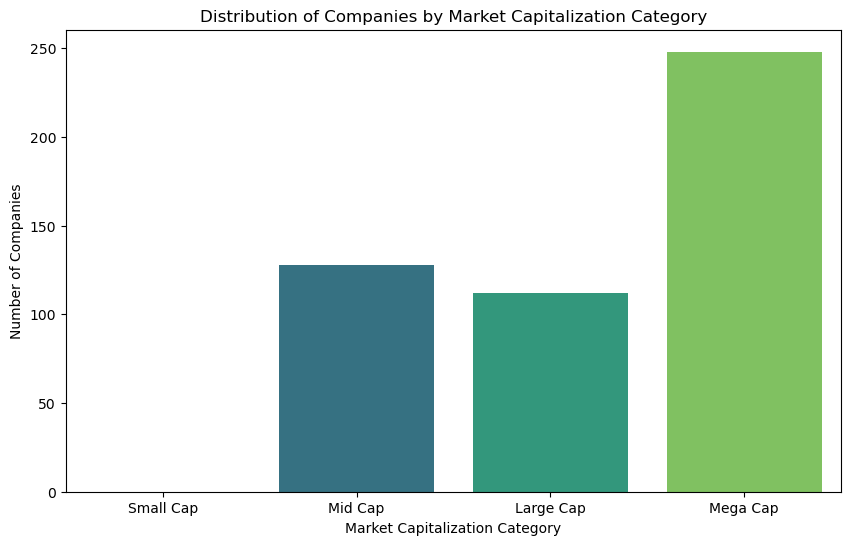

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MarCap_Category', data=df, palette='viridis')
plt.title('Distribution of Companies by Market Capitalization Category')
plt.xlabel('Market Capitalization Category')
plt.ylabel('Number of Companies')
plt.show()

Box Plot of Sales per Market Capitalization Category

A box plot can help you understand the distribution of sales within each market capitalization category.

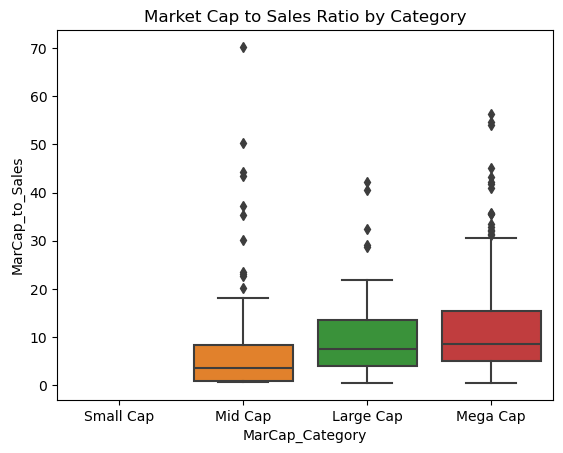

In [53]:
sns.boxplot(x='MarCap_Category', y='MarCap_to_Sales', data=df)
plt.title('Market Cap to Sales Ratio by Category')
plt.show()

### Histograms and Distribution Analysis

Without log transformation:

Skewness: The data might remain highly skewed, leading to histograms that are heavily concentrated in one area, making it hard to interpret the distribution.

Outliers: Extreme values (outliers) can dominate the plot, overshadowing the rest of the data and making it difficult to see the overall pattern.

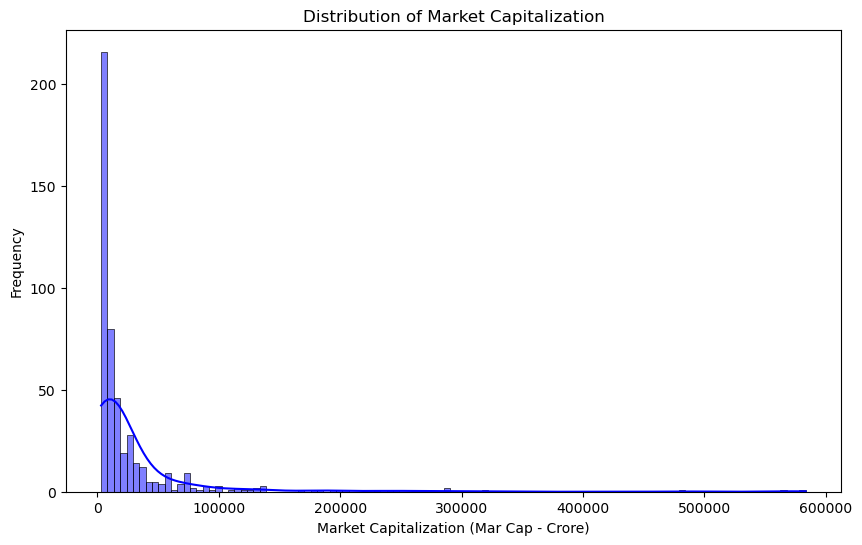

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], kde=True, color='blue')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Mar Cap - Crore)')
plt.ylabel('Frequency')
plt.show()

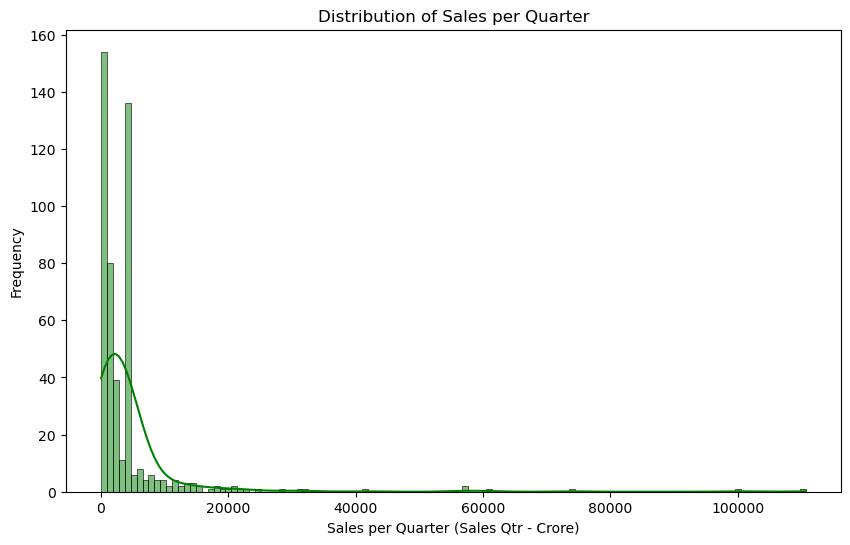

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Qtr - Crore'], kde=True, color='green')
plt.title('Distribution of Sales per Quarter')
plt.xlabel('Sales per Quarter (Sales Qtr - Crore)')
plt.ylabel('Frequency')
plt.show()

With log transformation:

Normalization: Log transformation can help normalize the data, making it more symmetric and easier to analyze.

Scale Reduction: It reduces the impact of extreme values, bringing the data into a more manageable range and revealing underlying patterns.

In [42]:
df['Log_MarCap'] = np.log(df['Mar Cap - Crore'])
df['Log_Sales'] = np.log(df['Sales Qtr - Crore'])

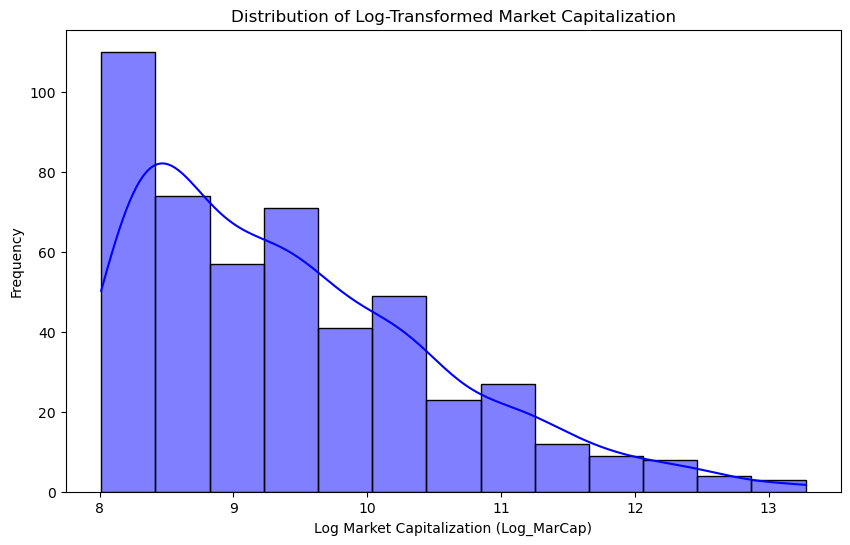

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_MarCap'], kde=True, color='blue')
plt.title('Distribution of Log-Transformed Market Capitalization')
plt.xlabel('Log Market Capitalization (Log_MarCap)')
plt.ylabel('Frequency')
plt.show()

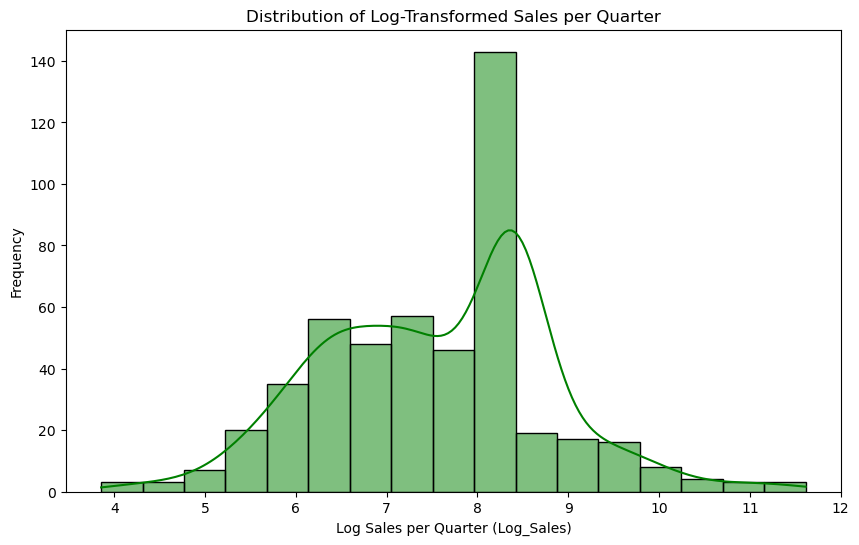

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Sales'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Sales per Quarter')
plt.xlabel('Log Sales per Quarter (Log_Sales)')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot and Relationship Analysis

Without log transformation:

Scale Issues: If one variable spans several orders of magnitude more than the other, it can be hard to see the relationship between the variables in a scatter plot.

Non-linearity: The relationship between the variables might appear non-linear, making it difficult to interpret and analyze.

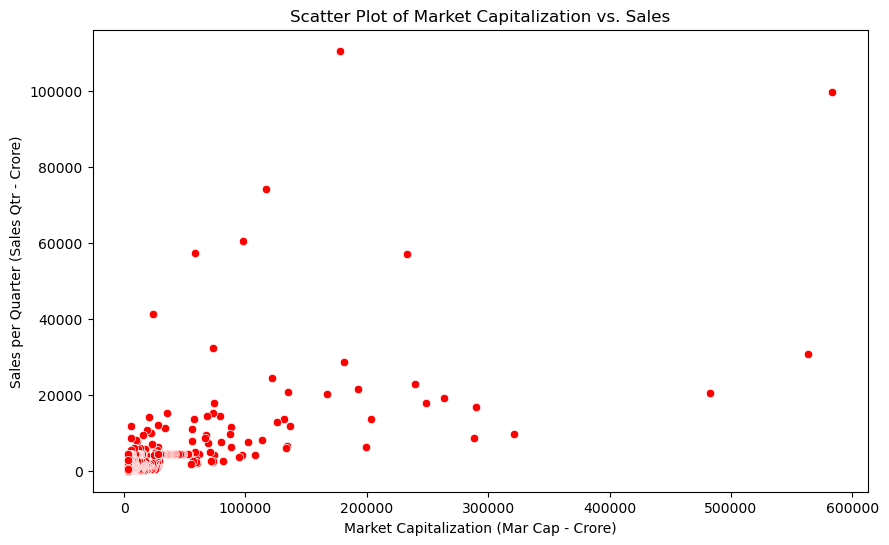

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df, color='red')
plt.title('Scatter Plot of Market Capitalization vs. Sales')
plt.xlabel('Market Capitalization (Mar Cap - Crore)')
plt.ylabel('Sales per Quarter (Sales Qtr - Crore)')
plt.show()

With log transformation:

Linear Relationship: Log transformation can often linearize relationships, making them easier to interpret and model.

Better Visualization: The scale becomes more uniform, allowing for a clearer view of the relationship between the variables.

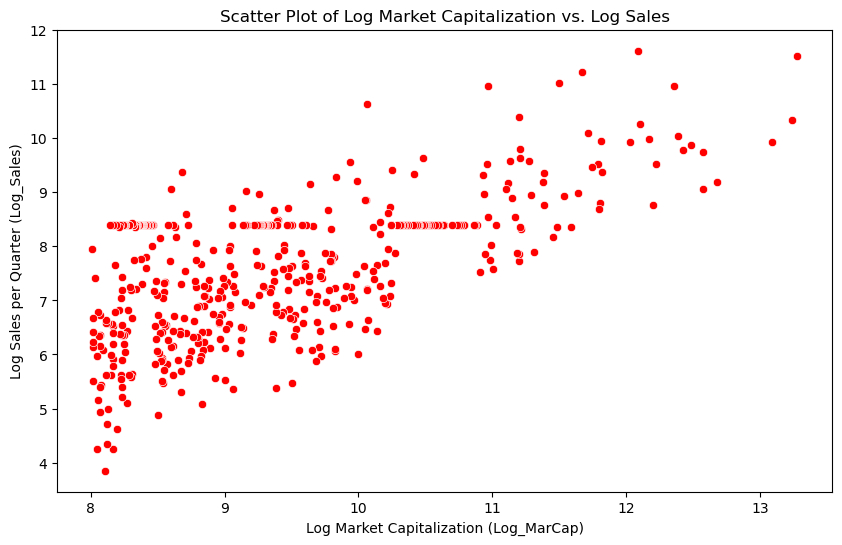

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_MarCap', y='Log_Sales', data=df, color='red')
plt.title('Scatter Plot of Log Market Capitalization vs. Log Sales')
plt.xlabel('Log Market Capitalization (Log_MarCap)')
plt.ylabel('Log Sales per Quarter (Log_Sales)')
plt.show()

Sales Performance Indicator: Create a binary feature indicating good or poor sales performance based on a threshold.

In [57]:
sales_threshold = df['Sales Qtr - Crore'].mean()
df['Sales_Performance'] = df['Sales Qtr - Crore'].apply(lambda x: 'Good' if x > sales_threshold else 'Poor')

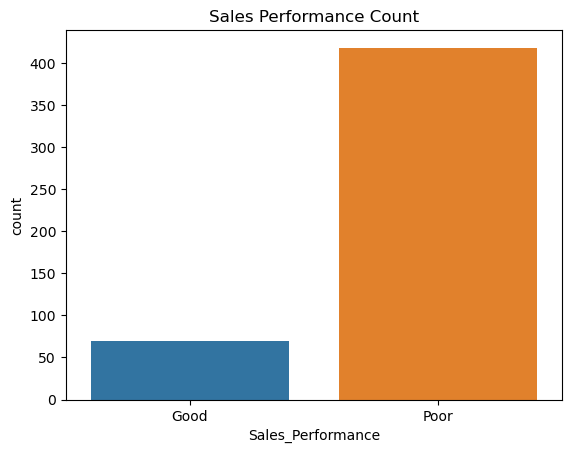

In [58]:
sns.countplot(x='Sales_Performance', data=df)
plt.title('Sales Performance Count')
plt.show()

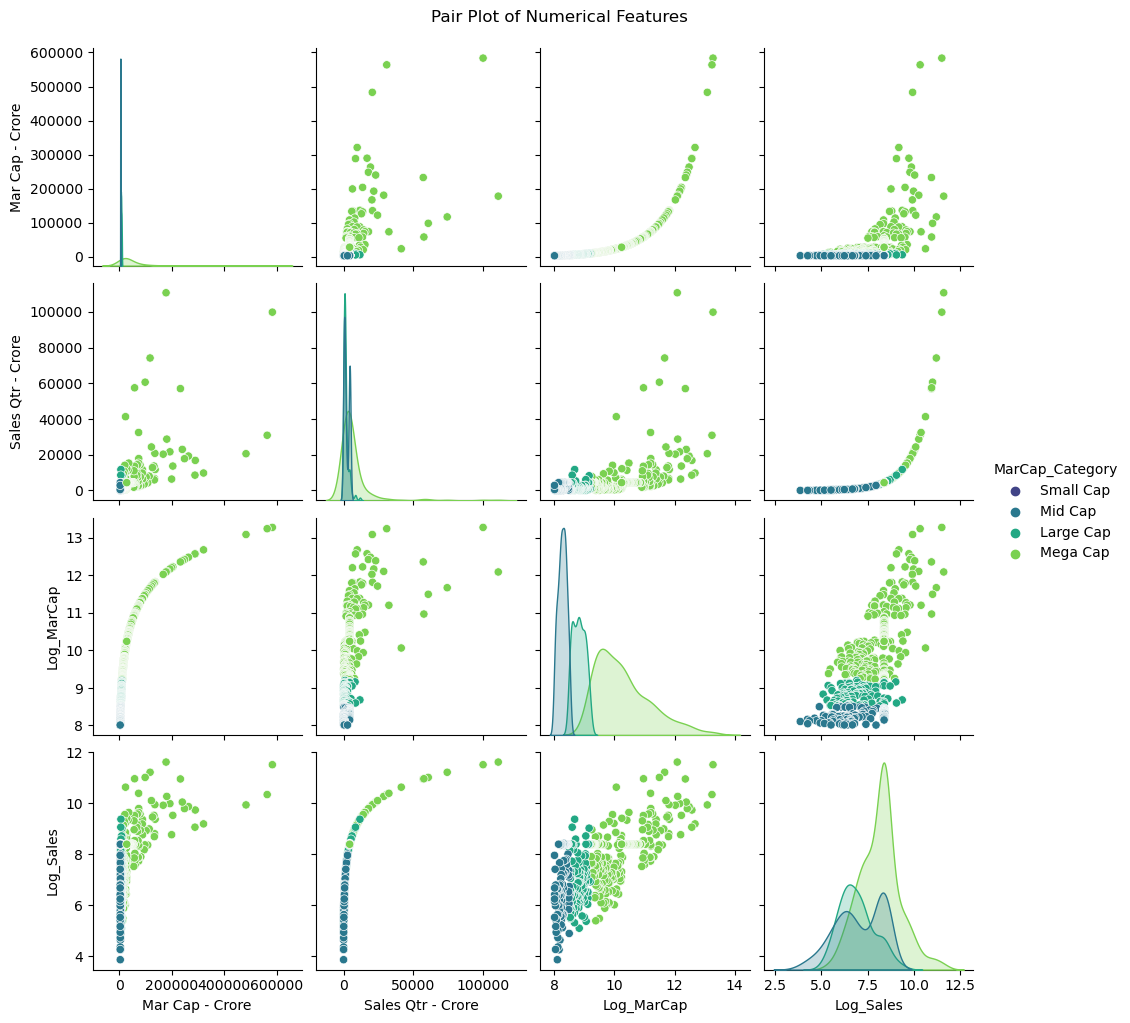

In [61]:
sns.pairplot(df, vars=['Mar Cap - Crore', 'Sales Qtr - Crore', 'Log_MarCap', 'Log_Sales'], hue='MarCap_Category', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

### Top 5 Companies with Highest Market Capitalization

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
2      TCS             563709.84        30904.00           18.240676        Mega Cap         13.242295   10.338641  Good                 1
3      HDFC Bank       482953.59        20581.27           23.465685        Mega Cap         13.087676   9.932137   Good                 1
4      ITC             320985.27        9772.02            32.847382        Mega Cap         12.679151   9.187278   Good                 1
5      H D F C         289497.37        16840.51           17.190535        Mega Cap         12.575901   9.731543   Good                 1
Name: count, dtype: int64


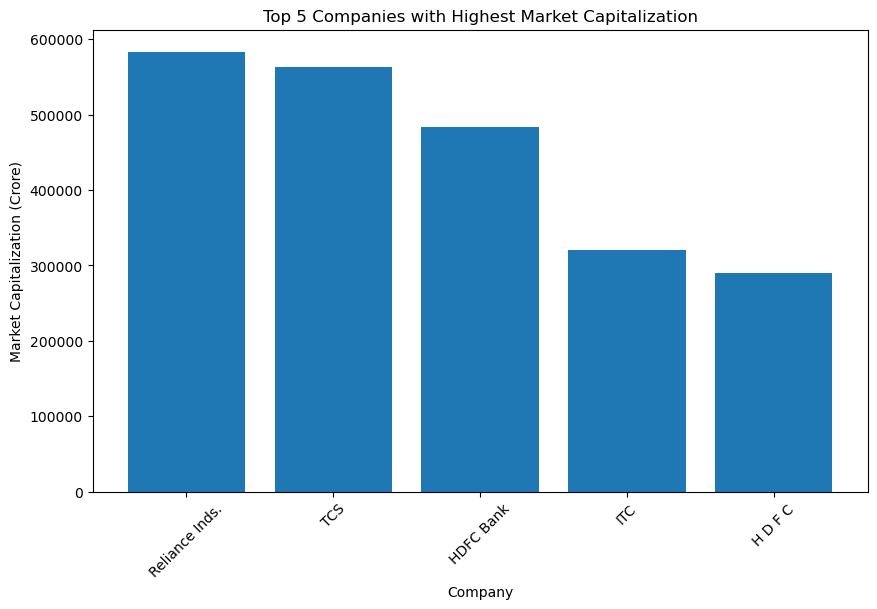

In [63]:
# Sort the dataset by market capitalization in descending order
sorted_data = df.sort_values('Mar Cap - Crore', ascending=False)

# Select the top 5 companies with the highest market capitalization
top_5_companies = sorted_data.head(5)


print(top_5_companies.value_counts())
# Plot the market capitalization of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies['Name'], top_5_companies['Mar Cap - Crore'])
plt.title('Top 5 Companies with Highest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

### BOTTOM 5 COMPANIES WITH LOW MARKET CAPITALIZATION

S.No.  Name             Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
495    Prime Focus      3031.50          609.61             4.972851         Mid Cap          8.016813    6.412819   Poor                 1
496    Lak. Vilas Bank  3029.57          790.17             3.834074         Mid Cap          8.016176    6.672248   Poor                 1
497    NOCIL            3026.26          249.27             12.140490        Mid Cap          8.015083    5.518537   Poor                 1
498    Orient Cement    3024.32          511.53             5.912302         Mid Cap          8.014442    6.237406   Poor                 1
499    Natl.Fertilizer  3017.07          2840.75            1.062068         Mid Cap          8.012041    7.951823   Poor                 1
Name: count, dtype: int64


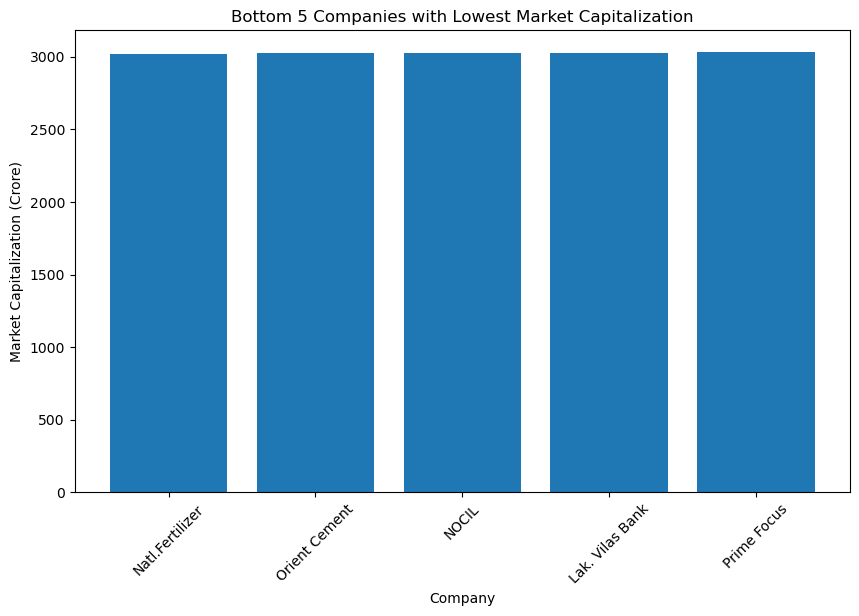

In [68]:
# Sort the dataset by market capitalization in ascending order
sorted_data = df.sort_values('Mar Cap - Crore')

# Select the bottom 5 companies with the lowest market capitalization
bottom_5_companies = sorted_data.head(5)


print(bottom_5_companies.value_counts())



# Plot the market capitalization of the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies['Name'], bottom_5_companies['Mar Cap - Crore'])
plt.title('Bottom 5 Companies with Lowest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

### TOP 5 COMPANIES WITH HIGHEST SALES

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
15     I O C L         178017.48        110666.93          1.608588         Mega Cap         12.089637   11.614280  Good                 1
24     Tata Motors     117071.87        74156.07           1.578723         Mega Cap         11.670543   11.213927  Good                 1
28     B P C L         98278.00         60616.36           1.621311         Mega Cap         11.495555   11.012320  Good                 1
55     H P C L         58034.78         57474.25           1.009753         Mega Cap         10.968798   10.959092  Good                 1
Name: count, dtype: int64


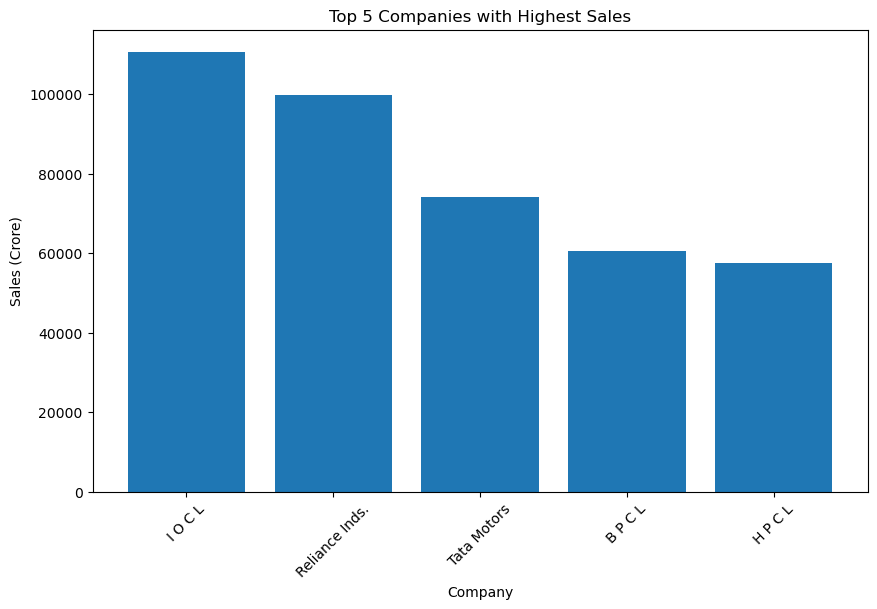

In [69]:
# Sort the dataset by sales in descending order
sorted_data = df.sort_values('Sales Qtr - Crore', ascending=False)

# Select the top 5 companies with the highest sales
top_5_companies_sales = sorted_data.head(5)

print(top_5_companies_sales.value_counts())
# Plot the sales of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_sales['Name'], top_5_companies_sales['Sales Qtr - Crore'])
plt.title('Top 5 Companies with Highest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

### BOTTOM 5 COMPANIES WITH LOWEST SALES

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
15     I O C L         178017.48        110666.93          1.608588         Mega Cap         12.089637   11.614280  Good                 1
24     Tata Motors     117071.87        74156.07           1.578723         Mega Cap         11.670543   11.213927  Good                 1
28     B P C L         98278.00         60616.36           1.621311         Mega Cap         11.495555   11.012320  Good                 1
55     H P C L         58034.78         57474.25           1.009753         Mega Cap         10.968798   10.959092  Good                 1
Name: count, dtype: int64


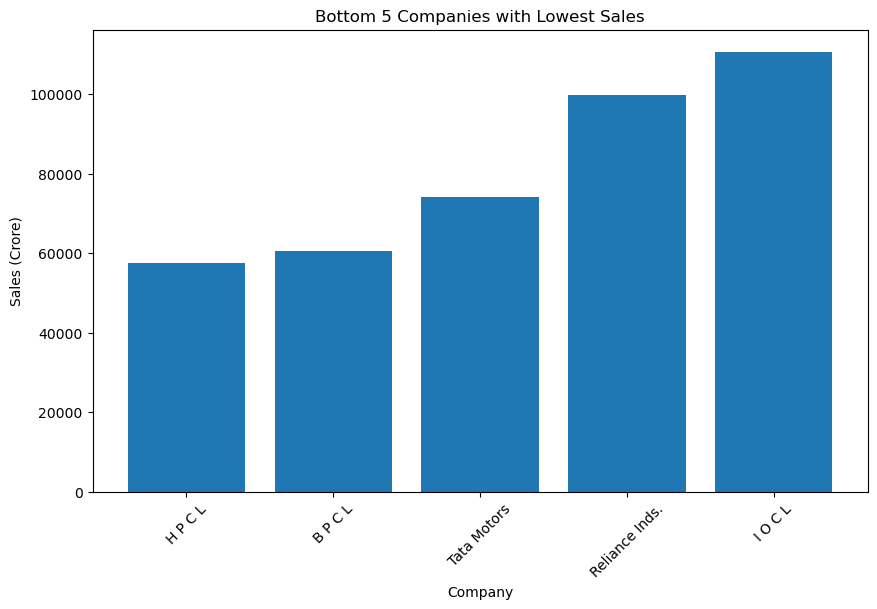

In [70]:
# Sort the dataset by sales in ascending order
sorted_data = df.sort_values('Sales Qtr - Crore')

# Select the bottom 5 companies with the highest sales
bottom_5_companies_sales = sorted_data.tail(5)
print(bottom_5_companies_sales.value_counts())
# Plot the sales of the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_sales['Name'], bottom_5_companies_sales['Sales Qtr - Crore'])
plt.title('Bottom 5 Companies with Lowest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

### TOP 5 COMPANIES WITH Market Capitalization to Sales Ratio

S.No.  Name              Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
130    Gillette India    21976.74         407.52             53.928004        Mega Cap         9.997740    6.010090   Poor                 1
193    Indiabulls Vent.  13396.15         238.43             56.184834        Mega Cap         9.502723    5.474076   Poor                 1
215    Symphony          11882.55         217.63             54.599779        Mega Cap         9.382826    5.382796   Poor                 1
468    La Opala RG       3510.93          69.77              50.321485        Mid Cap          8.163636    4.245204   Poor                 1
480    Central Dep. Ser  3316.31          47.24              70.201312        Mid Cap          8.106608    3.855241   Poor                 1
Name: count, dtype: int64


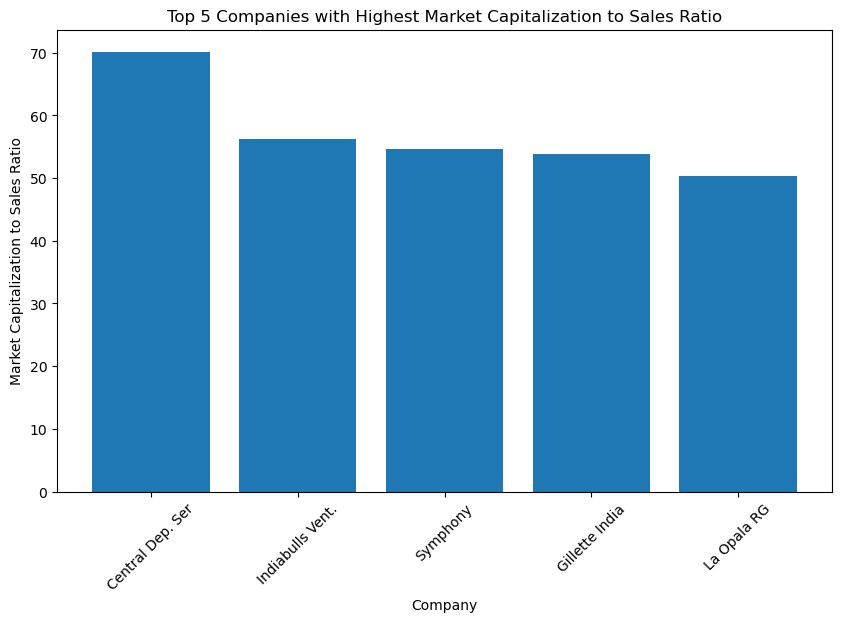

In [76]:
# Sort the dataset by profit margin in descending order
sorted_data = df.sort_values('MarCap_to_Sales', ascending=False)

# Select the top 5 companies with the highest profit margin
top_5_companies_pm = sorted_data.head(5)


print(top_5_companies_pm.value_counts())

# Plot the profit margin of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_pm['Name'], top_5_companies_pm['MarCap_to_Sales'])
plt.title('Top 5 Companies with Highest Market Capitalization to Sales Ratio')
plt.xlabel('Company')
plt.ylabel('Market Capitalization to Sales Ratio')
plt.xticks(rotation=45)
plt.show()

### TOP 5 COMPANIES WITH Market Capitalization to Sales Ratio

S.No.  Name             Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
123    Rajesh Exports   23495.54         41304.840000       0.568833         Mega Cap         10.064566   10.628735  Good                 1
333    Redington India  5896.54          11728.400000       0.502757         Large Cap        8.682121    9.369769   Good                 1
347    C P C L          5427.82          8587.170000        0.632085         Large Cap        8.599293    9.058025   Good                 1
464    Amber Enterp.    3529.87          4395.976849        0.802977         Mid Cap          8.169016    8.388445   Poor                 1
472    Hind.Construct.  3452.57          4395.976849        0.785393         Mid Cap          8.146874    8.388445   Poor                 1
Name: count, dtype: int64


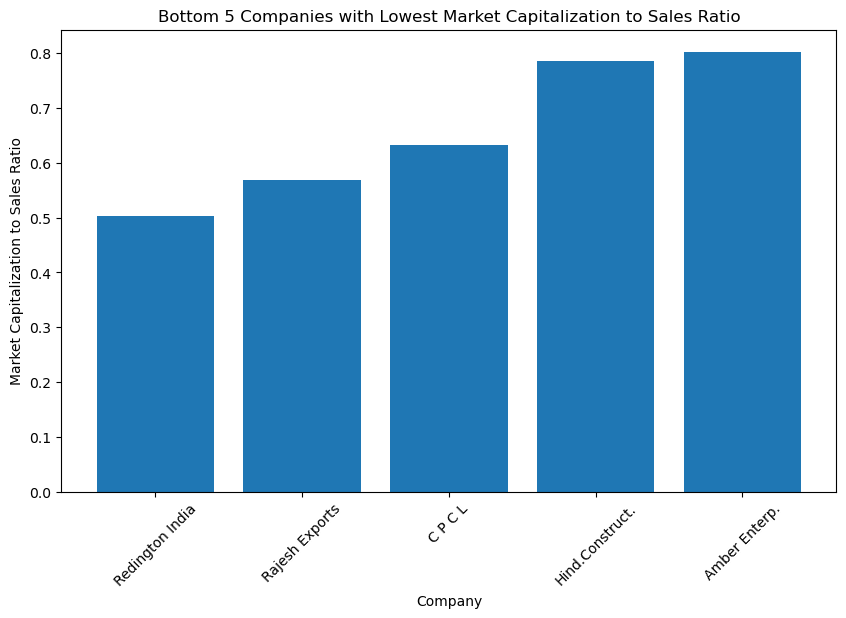

In [77]:
# Sort the dataset by profit margin in ascending order
sorted_data = df.sort_values('MarCap_to_Sales')

# Select the bottom 5 companies with the lowest profit margin
bottom_5_companies_pm = sorted_data.head(5)


print(bottom_5_companies_pm.value_counts())

# Plot the profit margin of the bottom 5 companies

plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_pm['Name'], bottom_5_companies_pm['MarCap_to_Sales'])
plt.title('Bottom 5 Companies with Lowest Market Capitalization to Sales Ratio')
plt.xlabel('Company')
plt.ylabel('Market Capitalization to Sales Ratio')
plt.xticks(rotation=45)
plt.show()

# CONCLUSION
As sales increase, there is a tendency for market capitalization to increase as well. This indicates that sales performance has a significant impact on the market value of a company.

Therefore, companies should focus on strategies to drive sales growth. This can involve expanding market reach, introducing new products or services, improving marketing and sales efforts, and targeting customer needs effectively.

While sales have a positive correlation with market capitalization, it's important to note that market capitalization is influenced by various other factors as well. These factors can include industry trends, company profitability, competitive landscape, management quality, brand value, and investor sentiment. Therefore, market capitalization should not be solely relied upon as a measure of a company's performance or value.